In [58]:
import pandas as pd

In [59]:
daily = pd.read_csv('bulletins.csv')
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2322 non-null   object
 1   Report  2322 non-null   object
dtypes: object(2)
memory usage: 36.4+ KB


## Asignar semana a reportes diarios

### Filtrar días que no correspondan al formato yyyy/mm/dd

In [60]:
# Create a mask where each entry is True if the date is in the correct format, and False otherwise
mask = pd.to_datetime(daily['Date'], format='%Y-%m-%d', errors='coerce').notna()

# Keep only the rows where the mask is True
daily = daily[mask]
daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2321 entries, 0 to 2321
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2321 non-null   object
 1   Report  2321 non-null   object
dtypes: object(2)
memory usage: 54.4+ KB


### Convertir fechas a tipo DateTime

In [61]:
daily['Date'] = pd.to_datetime(daily['Date'], format='%Y-%m-%d')
daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2321 entries, 0 to 2321
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2321 non-null   datetime64[ns]
 1   Report  2321 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 54.4+ KB


### Asignar semana según el calendario

In [62]:
# Create the 'Week' column
daily['Week'] = daily['Date'].dt.isocalendar().year.astype(str) + '-' + daily['Date'].dt.isocalendar().week.astype(str)
daily

,Date,Report,Week
0,2018-12-05,Acompaña presidente Andrés Manuel López Obrado...,2018-49
1,2018-12-06,Revela presidente Andrés Manuel López Obrador ...,2018-49
2,2018-12-07,"En Tuxpan, presidente de México anuncia plan d...",2018-49
3,2018-12-07,Destaca presidente avances en sistema de infor...,2018-49
4,2018-12-07,"En Acaponeta, presidente López Obrador anuncia...",2018-49
...,...,...,...
2317,2023-04-12,Departamento de Justicia de Estados Unidos dev...,2023-15
2318,2023-04-12,Países atenderán tráfico de drogas y control d...,2023-15
2319,2023-04-13,"Nuevo Laredo será sede de la Aduana Nacional, ...",2023-15
2320,2023-04-13,Presidente recibe visita de Jeremy Corbyn en P...,2023-15


In [63]:
unique_weeks = daily['Week'].unique()
print(f'Hay {len(unique_weeks)} semanas.')

Hay 194 semanas.


## Crear un DataFrame con reportes semanales

In [64]:
# Group by 'Week' and join all reports
weekly = daily.groupby('Week')['Report'].apply(' '.join).reset_index()
weekly

,Week,Report
0,2018-49,Acompaña presidente Andrés Manuel López Obrado...
1,2018-50,Prepara Gobierno de México recepción de peregr...
2,2018-51,"Seguridad pública e interior, prioridades de E..."
3,2018-52,El presidente Andrés Manuel López Obrador cele...
4,2019-1,Con inauguración de nuevas oficinas en Michoac...
...,...,...
189,2023-5,Tren Maya genera empleos y bienestar en locali...
190,2023-6,Comunidades del tramo 4 del Tren Maya acceden ...
191,2023-7,Brigada de rescate en Turquía alista regreso a...
192,2023-8,Empresas no deben comprometer abasto de agua p...


### Ordenar Semanas

In [65]:
# Create 'Year' and 'Week_Number' columns
weekly['Year'] = weekly['Week'].str.split('-').str[0].astype(int)
weekly['Week_Number'] = weekly['Week'].str.split('-').str[1].astype(int)

# Sort DataFrame by 'Year' and 'Week_Number'
weekly.sort_values(['Year', 'Week_Number'], inplace=True)

# Drop the 'Year' and 'Week_Number' columns
weekly.drop(['Year', 'Week_Number'], axis=1, inplace=True)

# Show the sorted DataFrame
weekly


,Week,Report
0,2018-49,Acompaña presidente Andrés Manuel López Obrado...
1,2018-50,Prepara Gobierno de México recepción de peregr...
2,2018-51,"Seguridad pública e interior, prioridades de E..."
3,2018-52,El presidente Andrés Manuel López Obrador cele...
4,2019-1,Con inauguración de nuevas oficinas en Michoac...
...,...,...
181,2023-11,México es más seguro que Estados Unidos: presi...
182,2023-12,"Es tiempo del sureste del país, afirma preside..."
183,2023-13,Agua de terrenos del AIFA abastecerá a Ciudad ...
184,2023-14,Presidente recibe en Palacio Nacional a Marian...


## Limpiar datos

In [66]:
import re
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [67]:
# Eliminar puntuación, numeros y caracteres especiales
weekly['Clean_Report'] = weekly['Report'].map(lambda x: re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ\s]', '', x))

# Convertir texto a minusculas
weekly['Clean_Report'] = weekly['Clean_Report'].map(lambda x: x.lower())

weekly['Clean_Report'].head()

0    acompaña presidente andrés manuel lópez obrado...
1    prepara gobierno de méxico recepción de peregr...
2    seguridad pública e interior prioridades de es...
3    el presidente andrés manuel lópez obrador cele...
4    con inauguración de nuevas oficinas en michoac...
Name: Clean_Report, dtype: object

<AxesSubplot: >

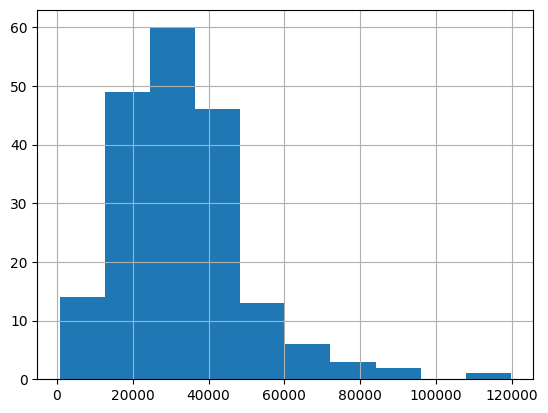

In [68]:
weekly['Clean_Report'].str.len().hist()

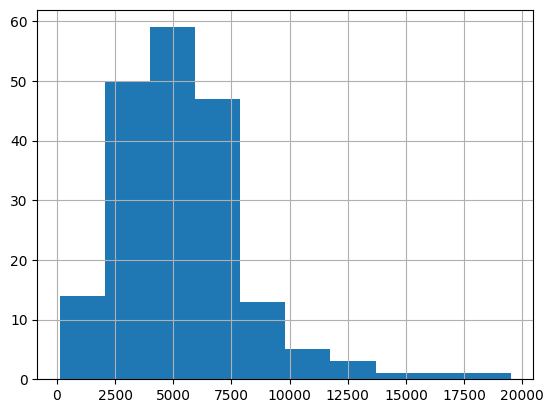

In [69]:
def plot_word_number_histogram(text):
    text.str.split().map(lambda x: len(x)).hist()

plot_word_number_histogram(weekly['Clean_Report'])

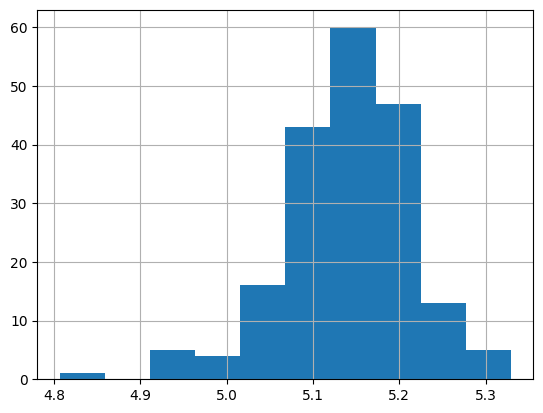

In [70]:
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

plot_word_length_histogram(weekly['Clean_Report'])

In [71]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop=set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


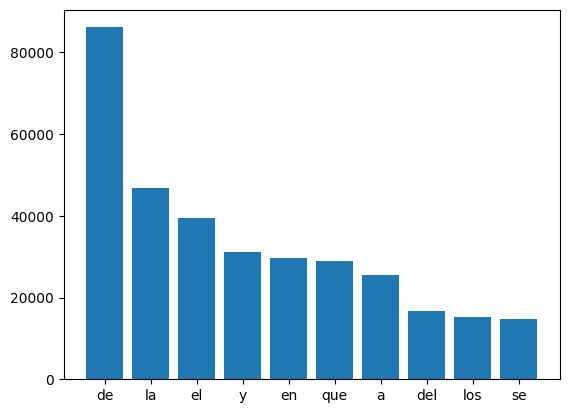

In [72]:
def plot_top_stopwords_barchart(text):
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(weekly['Clean_Report'])

In [73]:
def remove_stopwords(text):
    words = text.split()
    clean_words = [word for word in words if word not in stop]
    return ' '.join(clean_words)

weekly['Clean_Report'] = weekly['Clean_Report'].map(lambda x: remove_stopwords(x))

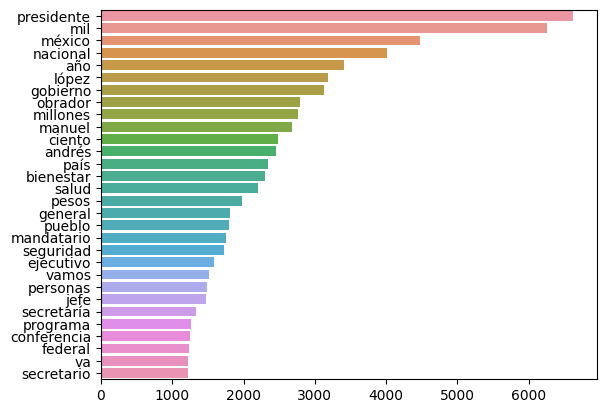

In [74]:
from collections import Counter
import seaborn as sns

def plot_top_non_stopwords_barchart(text):
    
    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word,count in most[:30]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(weekly['Clean_Report'])

In [75]:
def extract_common_words(text):
    
    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    words = []
    for word, count in most[:100]:
        if (word not in stop):
            words.append(word)
    return words

most_common = extract_common_words(weekly['Clean_Report'])

In [76]:
exceptions = ['covid', 'refinería', 'agua', 'tren', 'maya','vacunación','defensa', 'marina'\
              'mayores', 'corrupción', 'jóvenes', 'relaciones', 'oaxaca', 'imss', 'mujeres'\
              'pandemia', 'chiapas', 'niños', 'veracruz', 'guerrero', 'estudiantes', 'becas'\
              'california', 'seguro', 'banco', 'energía', 'sonora', 'protección', 'guardia']

def remove_common_words(text):
    
    words = text.split()
    
    clean_words = [word for word in words if word not in most_common]

    return ' '.join(clean_words)

weekly['Clean_Report'] = weekly['Clean_Report'].map(lambda x: remove_common_words(x))

In [77]:
def remove_least_common_words(text):
    
    words = text.split()
    word_freq = Counter(words)

    rare_words = [word for word, freq in word_freq.items() if freq == 1]
    
    clean_words = [word for word in words if word not in rare_words]

    return ' '.join(clean_words)

weekly['Clean_Report'] = weekly['Clean_Report'].map(lambda x: remove_least_common_words(x))

In [78]:
exceptions = ['paz', 'onu']

def remove_single_char_words(text):
    
    words = text.split()

    char_words = [word for word in words if len(word) <= 2 or word in exceptions]
    
    clean_words = [word for word in words if word not in char_words]

    return ' '.join(clean_words)

weekly['Clean_Report'] = weekly['Clean_Report'].map(lambda x: remove_single_char_words(x))

In [79]:
#Eliminar todas las palabras que sean estados de la república
def remove_states_words(text):
        
        words = text.split()
        
        states = ['aguascalientes', 'baja california', 'baja california sur', 'campeche', 'chiapas', 'chihuahua', 'ciudad de mexico', 'coahuila', 'colima', 'durango', 'estado de mexico', 'guanajuato', 'guerrero', 'hidalgo', 'jalisco', 'michoacan', 'morelos', 'nayarit', 'nuevo leon', 'oaxaca', 'puebla', 'queretaro', 'quintana roo', 'san luis potosi', 'sinaloa', 'sonora', 'tabasco', 'tamaulipas', 'tlaxcala', 'veracruz', 'yucatan', 'zacatecas']
        
        clean_words = [word for word in words if word not in states]
    
        return ' '.join(clean_words)

weekly['Clean_Report'] = weekly['Clean_Report'].map(lambda x: remove_states_words(x))


Week                                                      2021-36
Report          Presidente reafirma llamado a ordenar flujo mi...
Clean_Report    reafirma llamado ordenar flujo migratorio opor...
Name: 104, dtype: object


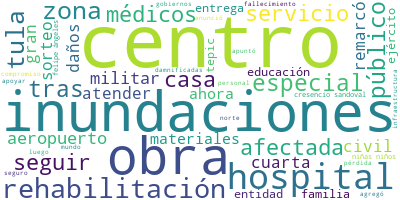

In [80]:
week = 110
report = weekly['Clean_Report'].iloc[week]
print(weekly.iloc[week])

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(report)
# Visualize the word cloud
wordcloud.to_image()

In [81]:
weekly.to_csv('clean_bulletins.csv', index=False)